# Gyakori elemhalmazok előállítása



----


A gyakori elemhalmazok keresése elvileg az elemhalmazháló bejárásaként is tekinthető. A bejárás komplexitása exponenciális.

## Apriori-elv


Ha egy elemhalmaz gyakori, akkor ezen elemhalmaz összes részhalmaza is gyakori.
Az apriori-elv alkalmazásával a részhalmazok exponenciális keresési tere csökkenthető. 

## Apriori algoritmus


A laborgyakorlatban az apriori algoritmus Python [implmentációját](https://pypi.org/project/apyori/) próbáljuk ki. 

Az Apriori algoritmus a legismertebb gyakori elemhalmaz keresésére alkalmas módszer. Szélességi bejárást valósít meg: az üres halmazból kiindulva szintenként halad előre a nagyobb méretű gyakori elemhalmazok meghatározásához. Minden iterációban az eggyel nagyobb méretű elemhalmazokkal foglalkozik, így az iterációk száma legfeljebb eggyel több, mint a legnagyobb gyakori elemhalmaz mérete.

In [4]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=8bfb582747d40ee2cafb30fe496a97a4784873f555c56d04dca9bc702c912b2b
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [5]:
from google.colab import files
files.upload()

Saving store_data_apriori.csv to store_data_apriori (1).csv


{'store_data_apriori.csv': b'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil\nburgers,meatballs,eggs\nchutney\nturkey,avocado\nmineral water,milk,energy bar,whole wheat rice,green tea\nlow fat yogurt\nwhole wheat pasta,french fries\nsoup,light cream,shallot\nfrozen vegetables,spaghetti,green tea\nfrench fries\neggs,pet food\ncookies\nturkey,burgers,mineral water,eggs,cooking oil\nspaghetti,champagne,cookies\nmineral water,salmon\nmineral water\nshrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt\nturkey,eggs\nturkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate\nmeatballs,milk,honey,french fries,protein bar\nred wine,shrimp,pasta,pepper,eggs,chocolate,shampoo\nrice,sparkling water\nspaghetti,mineral water,ham,body spray,pancakes,green tea\nburgers,grated 

Importáljuk a könyvtárakat (az apriori az apyori-ból is). 

In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from apyori import apriori 

Olvassuk be a *store_data_apriori.csv* állományt.

In [9]:
store_data = pd.read_csv('./store_data_apriori.csv') 

Hány tranzakciót tartalmaz a fájl?

In [10]:
len(store_data)

7500

Melyik a leghosszabb tranzakció (hány elemű)?

In [11]:
store_data.count(axis=1).max()

19

Mi az átlag tranzakció hossza (általában hány terméket vásárolnak)?

In [12]:
store_data.count(axis=1).mean()

3.9124

Hány különböző termék került eladásra?

In [13]:
all_items=np.concatenate(store_data.values)
all_items= [x for x in all_items if str(x) !='nan']
unique_items = np.unique(all_items)
print(len(unique_items))

120


Melyik terméket hányszor adták el?

In [14]:
from collections import  Counter
eladasok = Counter (all_items)
#print(eladasok)
eladasok_df = pd.DataFrame.from_dict(eladasok,orient ='index')
eladasok_df.sort_values(0,inplace = True,ascending = False)
eladasok_df.head(10)

,0
mineral water,1787
eggs,1348
spaghetti,1306
french fries,1282
chocolate,1230
green tea,990
milk,972
ground beef,737
frozen vegetables,715
pancakes,713


Átlagban egy terméket hányszor adtak el?

In [15]:
eladasok_df.median()

0    117.5
dtype: float64

Ábrázoljuk a termékeladások eloszlását (hisztogram).

<Axes: ylabel='Frequency'>

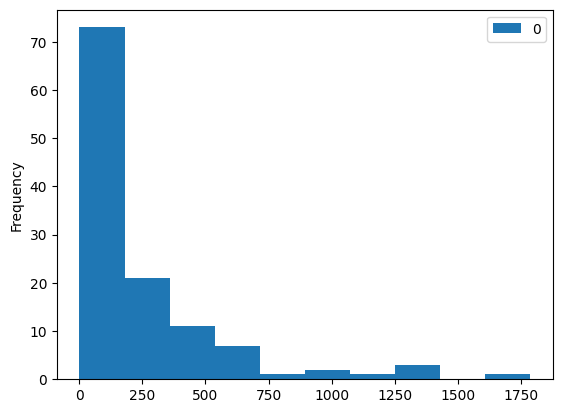

In [16]:
eladasok_df.plot.hist()

Az  apriori algoritmus bemenete egy  listákat tartalamazó lista. Alakítsuk át a dataframet "list of lists"-re.

In [17]:
records = [] 
for transaction in store_data.values:
  t = [x for x in transaction if str(x) != 'nan']
  records.append(t)

In [18]:
print(records)

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

Válasszuk meg a `min_support`, `min_confidence`, `min_lift`, `min_length` paramétereket és számoljuk ki a gyakori  elemhalmazokat. 

In [19]:
rules = apriori(records,min_support = 0.09,min_confidence =0.03, min_lift = 1)

for r in rules:
  print (r)

RelationRecord(items=frozenset({'chocolate'}), support=0.16386666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'chocolate'}), confidence=0.16386666666666666, lift=1.0)])
RelationRecord(items=frozenset({'eggs'}), support=0.17973333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'eggs'}), confidence=0.17973333333333333, lift=1.0)])
RelationRecord(items=frozenset({'french fries'}), support=0.17093333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'french fries'}), confidence=0.17093333333333333, lift=1.0)])
RelationRecord(items=frozenset({'frozen vegetables'}), support=0.09533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'frozen vegetables'}), confidence=0.09533333333333334, lift=1.0)])
RelationRecord(items=frozenset({'green tea'}), support=0.132, ordered_statistics=[OrderedStatistic(items_base=frozenset(

Hogyan változik az elemhalmazok száma a `min_support`, `min_confidence`, `min_lift`, `min_length` paraméterek változtatásával? 

Ha a min_support-nak növelem az értékét (pl.: 0.09-et adok), akkor több elemhalmazot kapok.
